In [1]:
import numpy as np
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display, Math
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 14
plt.rcParams["figure.figsize"] = (12,8)

# Differential Methods for Parabolic Equations :
## Heat Conduction Equation :

# $\qquad\qquad\displaystyle\boxed{\frac{\partial u(x,t)}{\partial t}=\kappa\frac{\partial u^2(x,t)}{\partial x^2}} $

$\qquad\qquad\displaystyle\text{range }: 0\leq x\leq a \ , \quad t\geq 0$

$\qquad\qquad\displaystyle\text{Initial condition}: u(x,0)=f(x) \ , \qquad \text{Boundary condition}\begin{equation*} = \left\{\begin{array}{rl} u(0,t)=A \\ u(a,t)=B \end{array}\right.\end{equation*}$

In [2]:
def heat_eqn(x,t,boundaryConditions,initialConditions):
    T=np.zeros((len(x),len(t)))
    T[ 0,:]=boundaryConditions[0]
    T[-1,:]=boundaryConditions[1]
    T[ :,0]=initialConditions    
    return T

## Explicit Method 
### Forward Time Centered Space Scheme (FTCS)
An explicit scheme (explicit in terms of n) is   
Now from L.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u_{i+1,j}-u_{i,j}}{k}$  
from R.H.S. ,                                                                                                                                                                                         
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2}$  
Now on comparing R.H.S and L.H.S. , we get :-                                                                     
                                                                                                  
$\begin{align} &{\therefore} \quad  \frac{\partial u(x,t)}{\partial t}=\kappa\frac{\partial u^2(x,t)}{\partial x^2} \\   &{or,} \quad \frac{u_{i,j+1}-u_{i,j}}{k}=\kappa\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2} \\  &{or,} \quad 
u_{i,j+1}-u_{i,j}=\kappa\frac{k}{h^2}[u_{i-1,j}-2u_{i,j}+u_{i+1,j}] \\  &{or,} \quad  u_{i,j+1}=u_{i,j}+\kappa\frac{k}{h^2}[u_{i-1,j}-2u_{i,j}+u_{i+1,j}] \qquad \text{let  }\lambda=\kappa\frac{k}{h^2}  \\  &{or,} \quad  u_{i,j+1}= \lambda u_{i-1,j}+(1-2\lambda)u_{i,j}+\lambda u_{i+1,j} \end{align}$  

$\text{ This is known as }\textbf{Schmidt method}$                                                                            
$\textbf{Bender-Schmidt method }$ uses the value $\lambda = \frac{1}{2}$.                                                        
 CFL condition, we know that for the solution to be stable                                                                      
 $\qquad \Delta t \le \frac{\Delta x^2}{2\kappa} $

In [3]:
def explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions):
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    lam = kappa*k/h**2
    for j in range(len(t)-1):
        for i in range(1,len(x)-1):
            T[i,j+1]=lam*T[i-1,j] + (1-2*lam)*T[i,j] + lam*T[i+1, j]  # Schmidt method

    return T

### Richardson method

Now from L.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u_{i,j+1}-u_{i,j-1}}{2k}$  
from R.H.S. ,                                                                                                                                                                                         
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2}$  

Now on comparing R.H.S and L.H.S. , we get :-

$\begin{align} &{\therefore} \quad \frac{\partial u(x,t)}{\partial t}=\kappa\frac{\partial u^2(x,t)}{\partial x^2} \\ &{or,} \quad \frac{u_{i,j+1}-u_{i,j-1}}{2k} = \kappa\frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2} \\ &{or,} \quad u_{i,j+1}-u_{i,j-1} = 2\frac{\kappa k}{h^2} (u_{i-1,j}-2u_{i,j}+u_{i+1,j}) \qquad\qquad\text{let  }\lambda=\frac{\kappa k}{h^2}\\ &{or,} \quad u_{i,j+1} = u_{i,j-1} + 2\lambda(u_{i-1,j}-2u_{i,j}+u_{i+1,j}) \end{align}$

In [4]:
def Richardson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions):
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    lam = kappa*k/h**2
    
    for i in range(1,len(x)-1):
        T[i,1]=lam*T[i-1,0] + (1-2*lam)*T[i,0] + lam*T[i+1, 0]  # Schmidt method

    for j in range(1,len(t)-1):
        for i in range(1,len(x)-1):
            T[i,j+1]=T[i,j-1] + lam*(T[i-1, j] - 2*T[i,j] + T[i+1, j])  

    return T

### DuFort Frankel method

$\begin{align} &{\therefore} \quad \frac{\partial u(x,t)}{\partial t}=\kappa\frac{\partial u^2(x,t)}{\partial x^2} \\ 
&{or,} \quad \frac{u_{i,j+1}-u_{i,j-1}}{2k} = \kappa\frac{u_{i-1,j}-2\frac{u_{i,j+1}+u_{i,j-1}}{2}+u_{i+1,j}}{h^2} \\ 
&{or,} \quad u_{i,j+1}-u_{i,j-1} = 2\frac{\kappa k}{h^2} (u_{i-1,j}-u_{i,j+1}-u_{i,j-1}+u_{i+1,j}) \qquad\qquad\text{let  }\lambda=\frac{\kappa k}{h^2}\\ 
&{or,} \quad u_{i,j+1} = u_{i,j-1} + 2\lambda(u_{i-1,j}-u_{i,j+1}-u_{i,j-1}+u_{i+1,j})  \\
&{or,} \quad u_{i,j+1} = u_{i,j-1} + 2\lambda u_{i-1,j}-2\lambda u_{i,j+1}-2\lambda u_{i,j-1}+2\lambda u_{i+1,j}  \\
&{or,} \quad u_{i,j+1} + 2\lambda u_{i,j+1}= u_{i,j-1}-2\lambda u_{i,j-1} + 2\lambda u_{i-1,j}+2\lambda u_{i+1,j} \\
&{or,} \quad (1+2\lambda)u_{i,j+1}= (1-2\lambda)u_{i,j-1} + 2\lambda( u_{i-1,j}+u_{i+1,j}) \\
&{or,} \quad u_{i,j+1}= \frac{(1-2\lambda)u_{i,j-1} + 2\lambda( u_{i-1,j}+u_{i+1,j})}{(1+2\lambda)}\end{align}$

In [5]:
def DuFort_Frankel_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions):
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    lam = kappa*k/h**2
    
    for i in range(1,len(x)-1):
        T[i,1]=lam*T[i-1,0] + (1-2*lam)*T[i,0] + lam*T[i+1, 0]  # Schmidt method

    for j in range(1,len(t)-1):
        for i in range(1,len(x)-1):
            T[i,j+1]=((1-2*lam)*T[i,j-1] + 2*lam*(T[i-1, j] + T[i+1, j]) ) / (1+2*lam)  

    return T

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

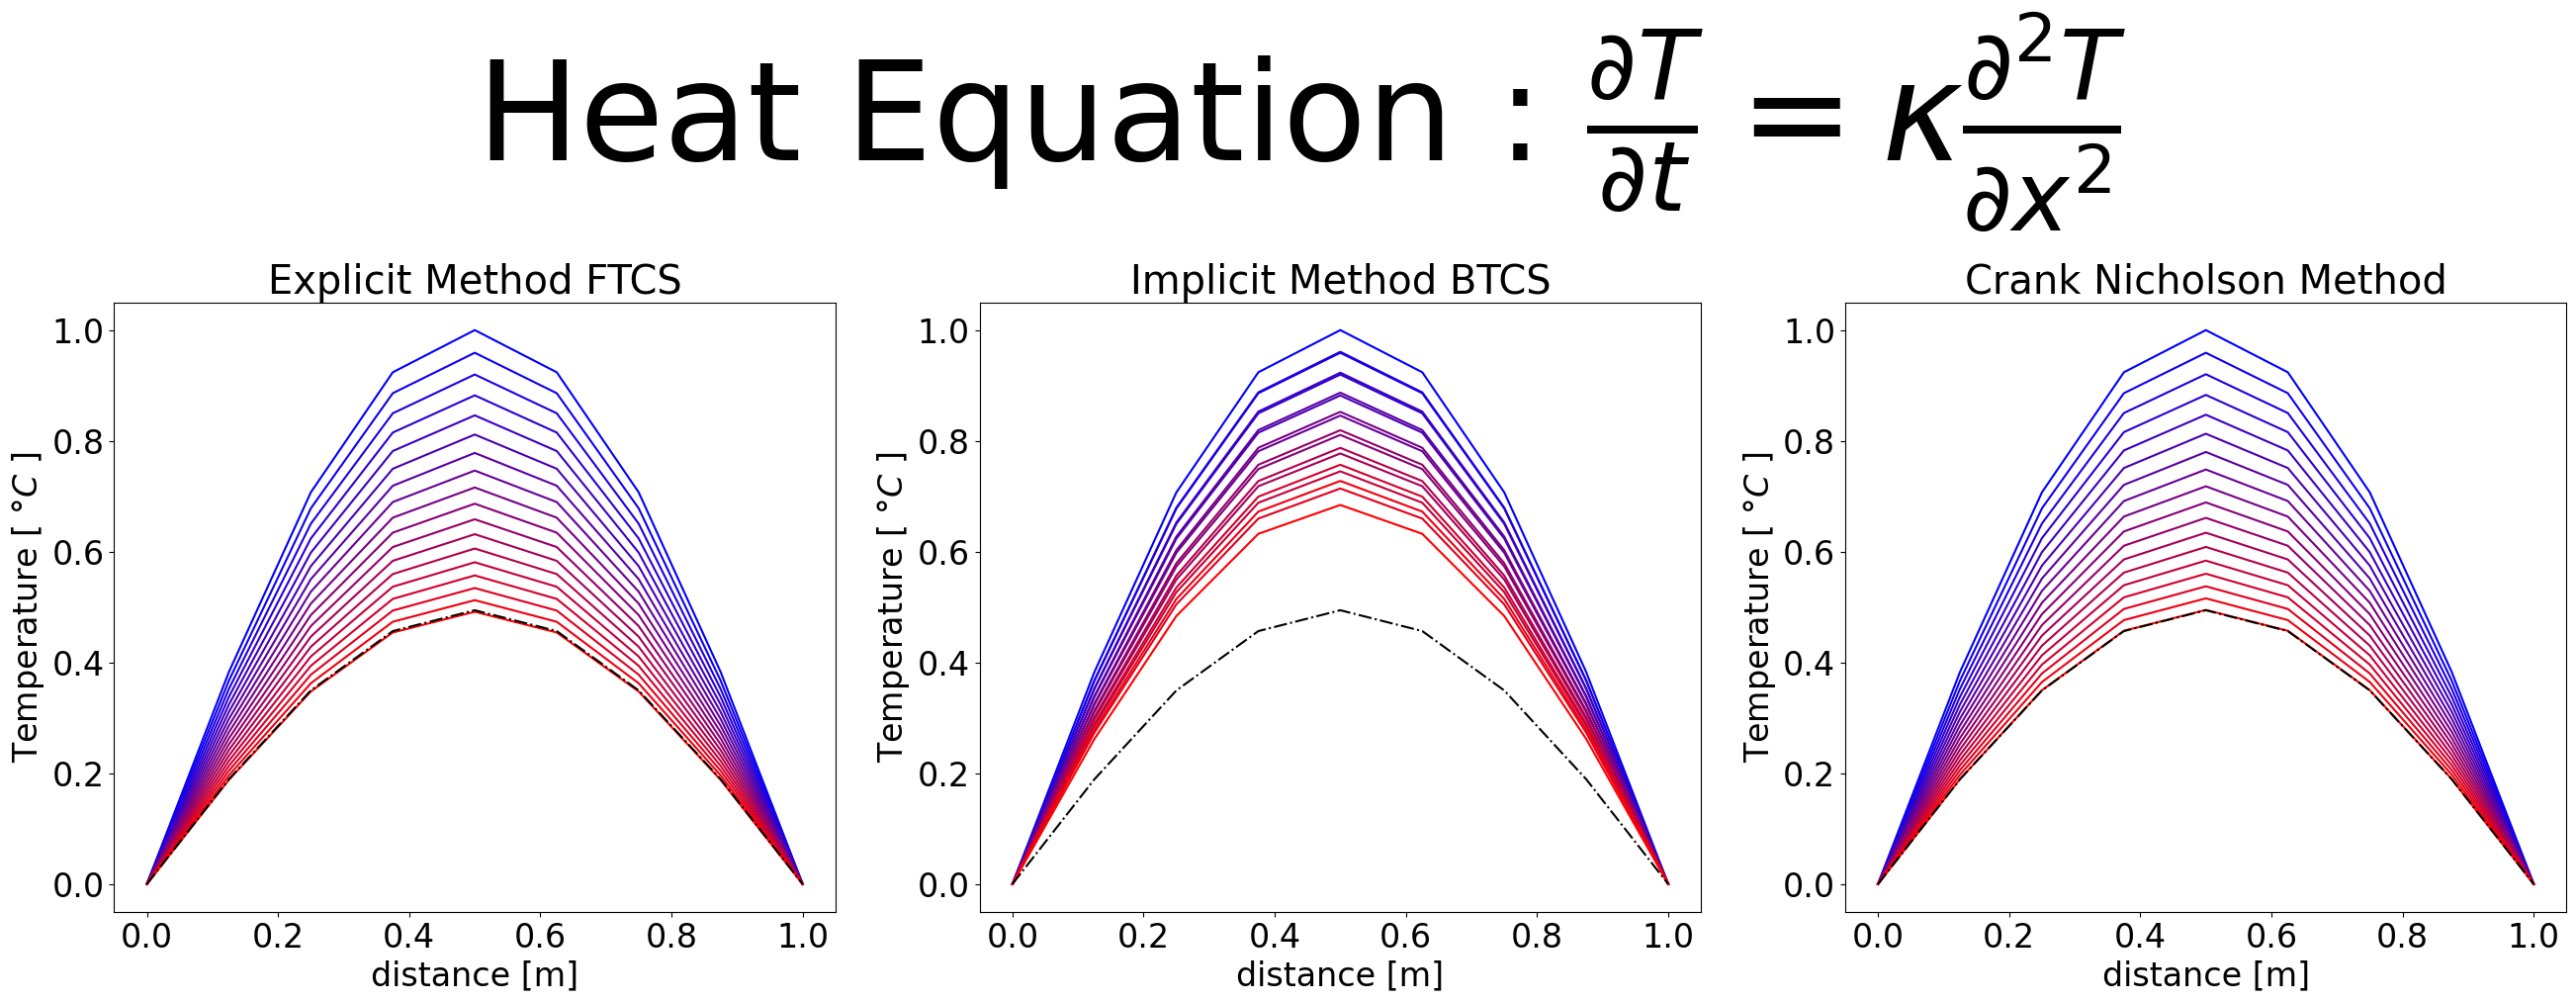

In [6]:
kappa=0.7
L = 1
tf = 0.1
N = 8
h=L/N
k=0.006
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=Richardson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=DuFort_Frankel_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
FE= np.sin(np.pi*x)*np.exp(-kappa*np.pi**2*np.max(t))

display(Math(r'\lambda = '+latex(kappa*k/h**2)))
display(Math(r'T_{initial} = '+latex(Matrix(T.round(3)))))
display(Math(r'T_{FTCS_{explicit}} = '+latex(Matrix(EH.round(3)))))
display(Math(r'T_{BTCS_{implicit}} = '+latex(Matrix(IH.round(3)))))
display(Math(r'T_{Crank Nicholson} = '+latex(Matrix(CN.round(3)))))
display(Math(r'T_{Exact} = '+latex(Matrix(FE.round(3)))))

fig=plt.figure(figsize=(32,8))
gs =fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    ax1.plot(x,EH[:,j],color=[R[j],G,B[j]])
    ax2.plot(x,IH[:,j],color=[R[j],G,B[j]])
    ax3.plot(x,CN[:,j],color=[R[j],G,B[j]])
ax1.plot(x,FE,'k-.')
ax2.plot(x,FE,'k-.')
ax3.plot(x,FE,'k-.')
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
plt.show()

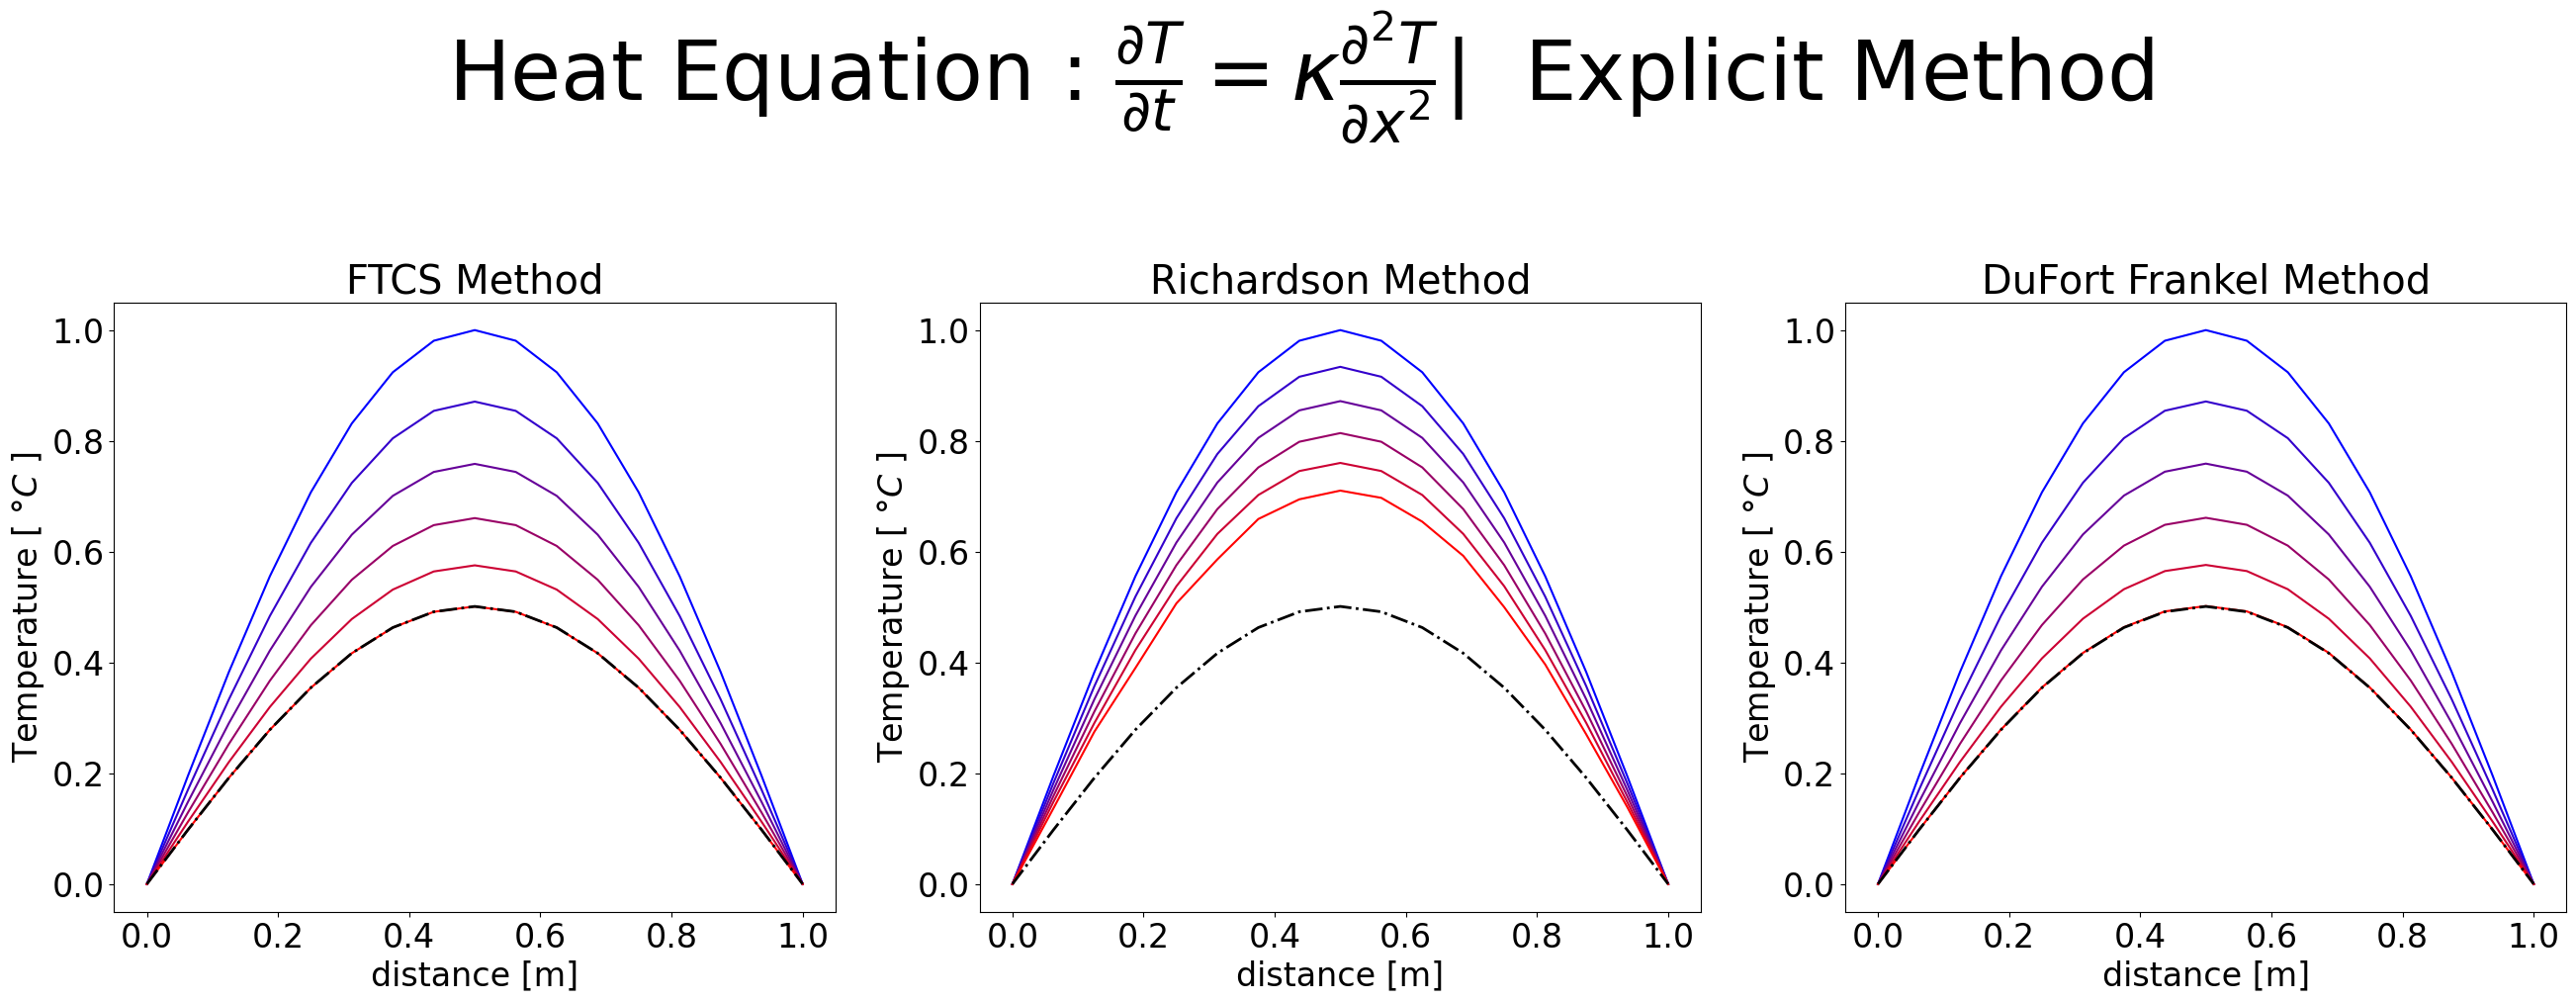

In [7]:
kappa=0.7
L = 1
tf = 0.1
N = 16
h=L/N
k=0.001
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=Richardson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=DuFort_Frankel_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
FE= np.sin(np.pi*x)*np.exp(-kappa*np.pi**2*np.max(t))

fig=plt.figure(figsize=(32,8))
gs =fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2} |$ ' +
             ' Explicit Method', fontsize=60,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    if j%20==0:
        ax1.plot(x,EH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax2.plot(x,IH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax3.plot(x,CN[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
ax1.plot(x,FE,'k-.', lw=2)
ax2.plot(x,FE,'k-.', lw=2)
ax3.plot(x,FE,'k-.', lw=2)
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('FTCS Method')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Richardson Method')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('DuFort Frankel Method')
plt.show()

## Implicit Method (BTCS)
Now from L.H.S. ,                                                                                                           
$\qquad\qquad\displaystyle \frac{\partial u(x,t)}{\partial t}=\frac{u_{i+1,j}-u_{i,j}}{k}$  
from R.H.S. ,                                                                                                                                                                                         
$\qquad\qquad\displaystyle \frac{\partial^2 u(x,t)}{\partial x^2}=\frac{u_{i-1,j+1}-2u_{i,j+1}+u_{i+1,j+1}}{h^2}$  
Now on comparing R.H.S and L.H.S. , we get :-                                                                     
$\qquad\qquad\displaystyle \frac{u_{i,j+1} − u_{i,j}}{k}= \kappa\frac{u_{i−1,{j+1}} - 2u_{i,j+1} + u_{i+1,j+1}}{h^2}  \qquad\qquad\text{Laasonen method}$         

$\qquad\qquad\displaystyle \frac{u_{i,j+1} − u_{i,j}}{k}+ \kappa\frac{−u_{i−1,{j+1}} + 2u_{i,j+1} − u_{i+1,j+1}}{h^2}= 0$         
This is the backward Euler scheme (implicit in time) for $j > 0$ and $i\in{1, . . . , N}.$                                                                                        
It must be further justified that indeed the implicit scheme can be used the values $u_{i,j+1}.$                           
To this end, we have to write out explicitly all N equations, yielding a linear equation system.                                 
Now, we need to check whether the resulting matrix is invertible.                                                          

$\qquad\qquad\displaystyle \frac{u_{i,j+1}}{k} − \frac{u_{i,j}}{k} - \kappa\frac{u_{i−1,j+1}}{h^2} + 2\kappa\frac{u_{i,j+1}}{h^2} − \kappa\frac{u_{i+1,j+1}}{h^2}= 0$                                                              

$\qquad\qquad\displaystyle \bigg(\frac{1}{k}+\frac{2\kappa}{h^2}\bigg)u_{i,j+1} − \frac{u_{i,j}}{k} - \frac{\kappa}{h^2}\bigg(u_{i−1,j+1} + u_{i+1,j+1}\bigg)= 0$                                                                             

Now multiply $k$ on both sides                                                                                                          

$\qquad\qquad\displaystyle \bigg(1+\frac{2\kappa k}{h^2}\bigg)u_{i,j+1} − u_{i,j} - \frac{\kappa k}{h^2}\bigg(u_{i−1,j+1} + u_{i+1,j+1}\bigg)= 0$                                                                                                      

Rearranging to isolate $ u_{i,j} $:

$\qquad\qquad\displaystyle \bigg(1+\frac{2\kappa k}{h^2}\bigg)u_{i,j+1}  - \frac{\kappa k}{h^2}\bigg(u_{i−1,j+1} + u_{i+1,j+1}\bigg)= u_{i,j}$                                                                                                                                                                                                                                

Let $\lambda = \kappa\frac{k}{h^2}$                                                                                                  
## $\qquad\quad\displaystyle (1+2\lambda)u_{i,j+1}-\lambda(u_{i-1,j+1}+u_{i+1,j+1})=u_{i,j}$                                      

$\qquad\qquad\displaystyle -\lambda u_{i-1,j+1} + (1+2\lambda)u_{i,j+1} -\lambda u_{i+1,j+1} = u_{i,j}$                                  

The corresponding tridiagonal matrix form becomes:

$\qquad\qquad\displaystyle AU^{j+1}= U^j$ ,                                                                                             
Tridiagonal Matrix : Thomas Algorithm                                                                                                        
 $\qquad\displaystyle \begin{pmatrix} 
   1+2\lambda & -\lambda   &            &      0   \\
     -\lambda & 1+2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &   -\lambda & 1+2\lambda & -\lambda  \\
            0 &          0 &   -\lambda & 1+2\lambda \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j+1} \\
   u_{2,j+1} \\
   \vdots \\
   u_{n-2,j+1} \\
   u_{n-1,j+1} \end{Bmatrix} =
  \begin{Bmatrix} 
   u_{1,j}+\lambda u_{0,j+1} \\
   u_{2,j} \\
   \vdots \\
   u_{n-2,j} \\
   u_{n-1,j}+\lambda u_{n,j+1}
  \end{Bmatrix}$

In [8]:
def implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions):
    lam = kappa*k/h**2
    n,m=len(x),len(t)
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    A=np.diag([1+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    
    for j in range(1,m):
        b    = T[1:-1,j-1].copy()
        b[ 0]= b[0]+lam*T[0,j]
        b[-1]= b[-1]+lam*T[-1,j]
        sol  = np.linalg.solve(A,b)
        T[1:-1,j]=sol
    
    return T

## Crank Nicholson Method


The Crank-Nicholson scheme is a special case of the $\theta$-scheme, where $\theta = 0.5$.                                 
It is defined as the average of the forward time-centered spatial difference (FTCS) and backward time-centered spatial difference (BTCS).                                                                                                            
This gives a second-order accurate scheme in both space and time.

The general $\theta$-scheme is:

$\qquad\qquad\displaystyle\frac{u_{i,j+1} − u_{i,j}}{k} = \kappa\bigg(\theta \frac{u_{i−1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}}{h^2} + (1 - \theta) \frac{u_{i−1,j} - 2u_{i,j} + u_{i+1,j}}{h^2}\bigg).$

For the Crank-Nicholson method, $\theta = 0.5$, so the equation simplifies to:

$\qquad\qquad\displaystyle \frac{u_{i,j+1} − u_{i,j}}{k} = \frac{\kappa}{2} \left( \frac{u_{i−1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}}{h^2} + \frac{u_{i−1,j} - 2u_{i,j} + u_{i+1,j}}{h^2} \right).$

$\qquad\qquad\displaystyle \frac{u_{i,j+1} − u_{i,j}}{k} = \frac{\kappa}{2h^2} \left( (u_{i−1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}) + (u_{i−1,j} - 2u_{i,j} + u_{i+1,j}) \right).$

Multiplying both sides by $ k $:

$\qquad\qquad\displaystyle u_{i,j+1} − u_{i,j} = \frac{\kappa k}{2h^2} (u_{i−1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}) + \frac{\kappa k}{2h^2} (u_{i−1,j} - 2u_{i,j} + u_{i+1,j}).$

Defining $\lambda = \kappa \frac{k}{h^2} $:

$\qquad\qquad\displaystyle u_{i,j+1} − u_{i,j} = \frac{\lambda}{2} (u_{i−1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}) + \frac{\lambda}{2} (u_{i−1,j} - 2u_{i,j} + u_{i+1,j}).$

Rearranging to isolate $ u_{i,j+1} $:

$\qquad\qquad\displaystyle \left(1 + \lambda \right) u_{i,j+1} - \frac{\lambda}{2} (u_{i-1,j+1} + u_{i+1,j+1}) = \left(1 - \lambda \right) u_{i,j} + \frac{\lambda}{2} (u_{i−1,j} + u_{i+1,j}).$

Now, we can write this equation in matrix form. For each $j$, we have:

$\qquad\qquad\displaystyle \left(-\frac{\lambda}{2}\right) u_{i-1,j+1} + \left(1+\lambda\right) u_{i,j+1} - \left(\frac{\lambda}{2}\right) u_{i+1,j+1} = \left(\frac{\lambda}{2}\right) u_{i-1,j} + \left(1-\lambda\right) u_{i,j} + \left(\frac{\lambda}{2}\right) u_{i+1,j}.$                                                                                 

Multiplying 2 on both sides                                                                                                  

$\qquad\qquad\displaystyle -\lambda u_{i-1,j+1} + 2\left(1+\lambda\right) u_{i,j+1} - \lambda u_{i+1,j+1} = \lambda u_{i-1,j} + 2\left(1-\lambda\right) u_{i,j} + \lambda u_{i+1,j}.$

The corresponding tridiagonal matrix equation becomes:

$\qquad\qquad\displaystyle A \mathbf{U}^{n+1} = B \mathbf{U}^n + \mathbf{b}, $                                                                      


 $\qquad\displaystyle \begin{pmatrix} 
   2+2\lambda & -\lambda   &            &      0   \\
     -\lambda & 2+2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &   -\lambda & 2+2\lambda & -\lambda  \\
              &          0 &   -\lambda & 2+2\lambda \end{pmatrix}
  \begin{Bmatrix}
   u_{1,j+1} \\ u_{2,j+1} \\ \vdots \\ \vdots \\ u_{n-1,j+1} \end{Bmatrix} =
  \begin{pmatrix} 
   2-2\lambda &  \lambda   &            &      0   \\
      \lambda & 2-2\lambda &            &          \\
              &  \ddots    &    \ddots  &      0   \\
              &    \lambda & 2-2\lambda &  \lambda  \\
              &          0 &    \lambda & 2-2\lambda \end{pmatrix}
  \begin{Bmatrix} u_{1,j} \\ u_{2,j} \\ \vdots \\ \vdots \\ u_{n-1,j} \end{Bmatrix} {+}
  \begin{Bmatrix} \lambda(u_{0,j} + u_{0,j+1}) \\ 0 \\ \vdots \\ 0 \\ \lambda(u_{n,j} + u_{n,j+1}) \end{Bmatrix} $
  
Here the classification (whether implicit or explicit) depends on the choice of $\theta\in[0, 1].$                           

In [9]:
def Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions):
    lam = kappa*k/h**2
    n,m=len(x),len(t)
    T=heat_eqn(x,t,boundaryConditions,initialConditions)
    A=np.diag([2+2*lam]*(n-2),0) + np.diag([-lam]*(n-3),-1) + np.diag([-lam]*(n-3),1)
    B=np.diag([2-2*lam]*(n-2),0) + np.diag([ lam]*(n-3),-1) + np.diag([ lam]*(n-3),1)
    
    for j in range(0,m-1):
        b=T[1:-1,j].copy()
        b=np.dot(B,b)
        b[0]=b[0]+lam*(T[0,j]+T[0,j+1])
        b[-1]=b[-1]+lam*(T[-1,j]+T[-1,j+1])
        solution=np.linalg.solve(A,b)
        T[1:-1,j+1]=solution
        
    return T

If the initial temperature of the rod were                                                                                             
$\qquad u(x,0) = \sin \pi x \quad 0\le x\le 1$                                                                                                                     
and if the BCs were                                                                                                                                                                                       
$\qquad u(0,t) = 0   $                                                                                                                  
$\qquad u(1,t) = 0   $                                                                                                                  
what would be the behavior of the rod temperature $u(x,t)$ for later values of time?                                                                                                                     


The exact solution to the heat equation with these initial and boundary conditions can be expressed as:

$\qquad\qquad u(x, t) = \sum_{n=1}^{\infty} B_n e^{-\lambda_n \kappa t} \sin(n \pi x)$

Where:
- $B_n$ are the Fourier coefficients based on the initial condition, calculated as:

$ \qquad\qquad B_n = \frac{2}{1} \int_0^1 \sin(\pi x) \sin(n \pi x) \, dx $

For $ n = 1 $, we have:

$\qquad B_1 = 1 \quad \text{(since \(\sin(\pi x)\) matches \(\sin(\pi x)\))} $

For $ n \neq 1 $, the orthogonality property of sine functions ensures that $ B_n = 0 $.

The eigenvalues $\lambda_n$ for the problem are given by:

$\qquad \lambda_n = n^2 \pi^2 $

So the exact solution becomes:

$\qquad\qquad u(x, t) = \exp({-\pi^2 \kappa t}) \sin(\pi x) $

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

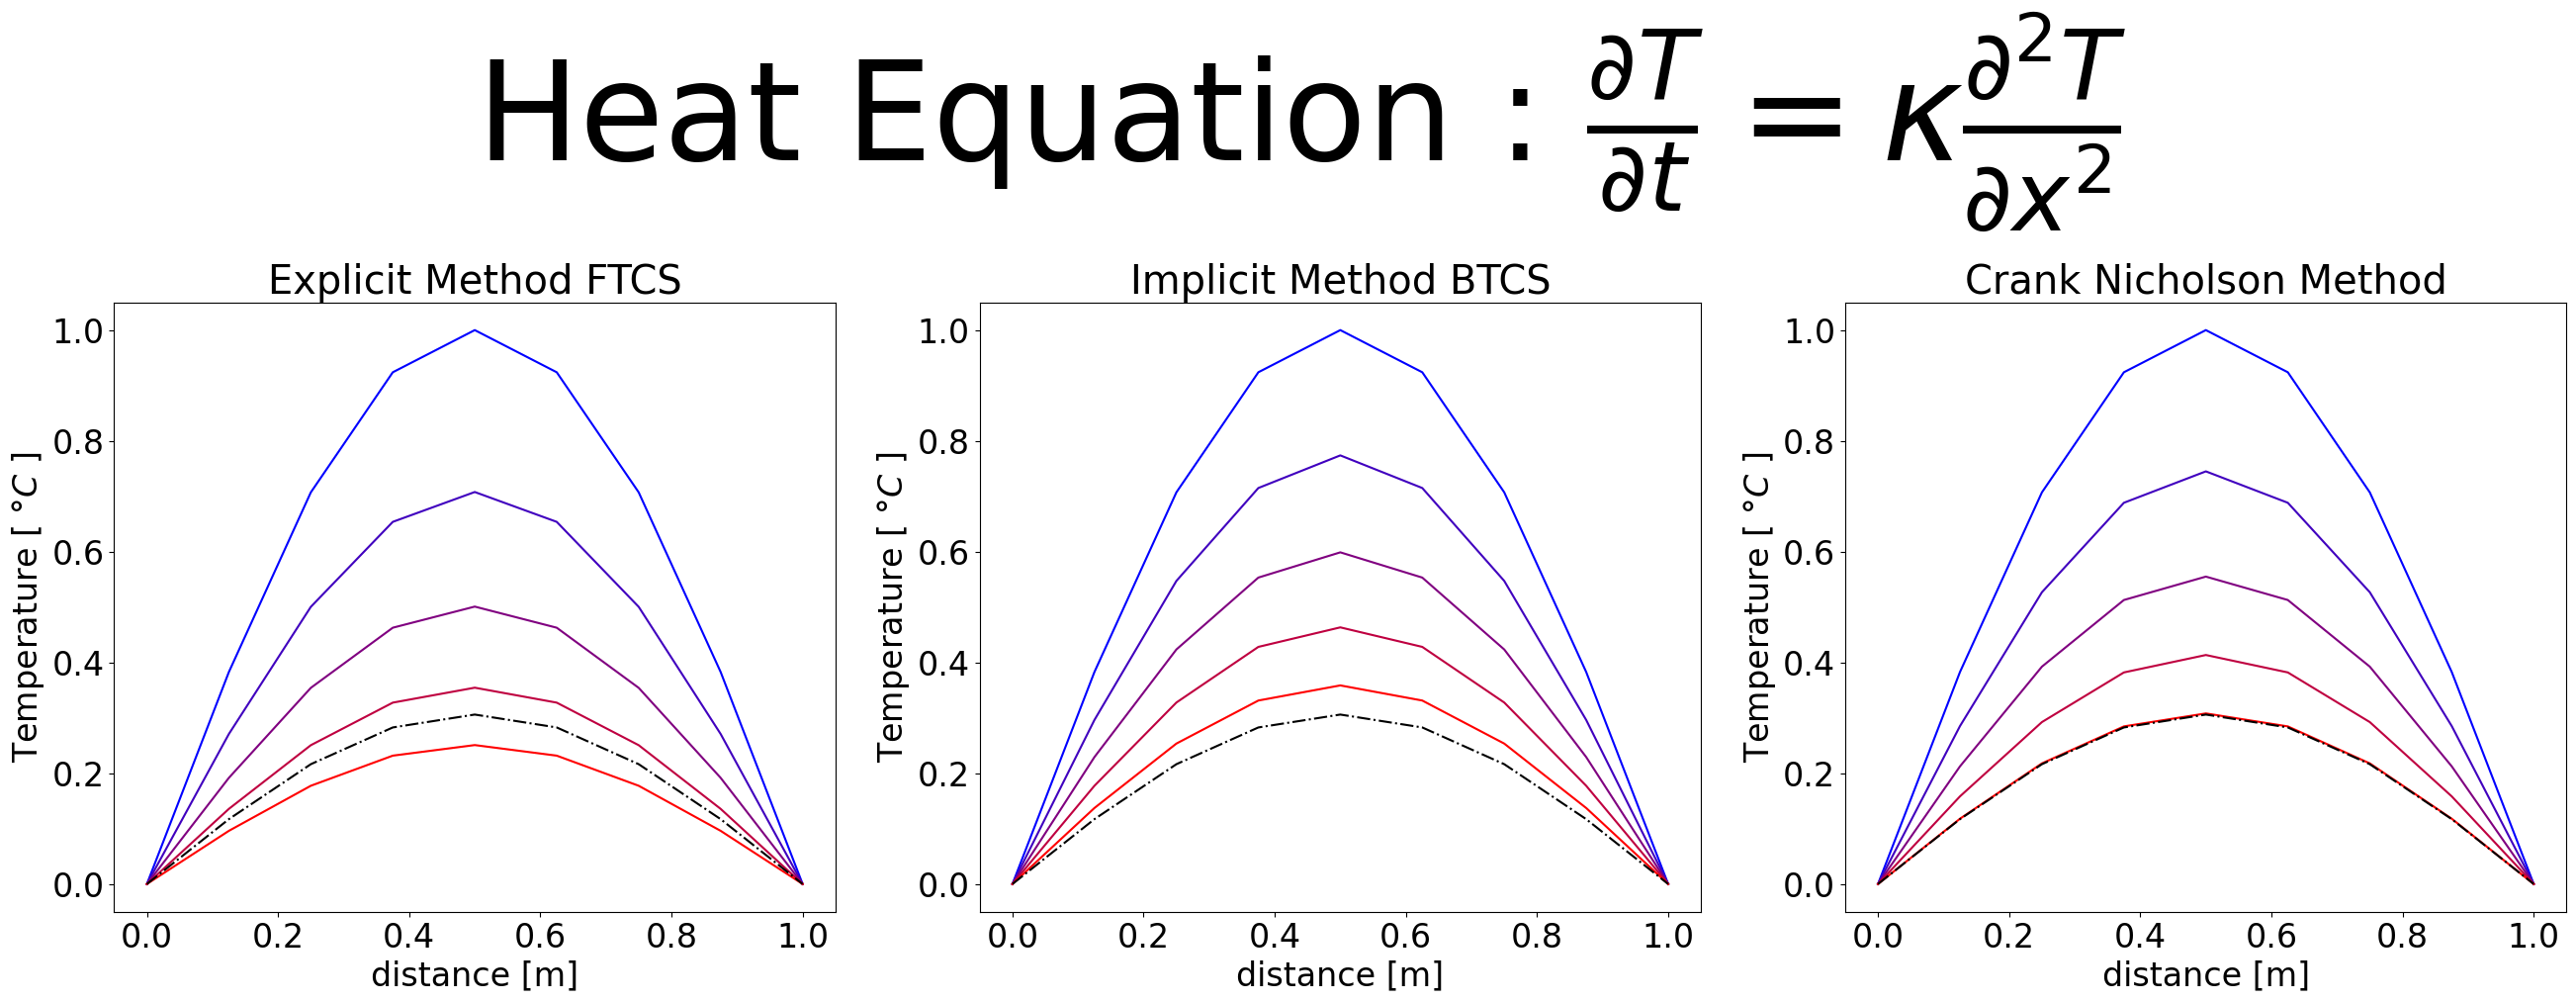

In [10]:
kappa=1
L = 1
tf = 0.1
N = 8
h=L/N
k=0.03
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
FE= np.sin(np.pi*x)*np.exp(-kappa*np.pi**2*np.max(t))

display(Math(r'\lambda = '+latex(kappa*k/h**2)))
display(Math(r'T_{initial} = '+latex(Matrix(T.round(3)))))
display(Math(r'T_{FTCS_{explicit}} = '+latex(Matrix(EH.round(3)))))
display(Math(r'T_{BTCS_{implicit}} = '+latex(Matrix(IH.round(3)))))
display(Math(r'T_{Crank Nicholson} = '+latex(Matrix(CN.round(3)))))
display(Math(r'T_{Exact} = '+latex(Matrix(FE.round(3)))))

fig=plt.figure(figsize=(32,8))
gs =fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    ax1.plot(x,EH[:,j],color=[R[j],G,B[j]])
    ax2.plot(x,IH[:,j],color=[R[j],G,B[j]])
    ax3.plot(x,CN[:,j],color=[R[j],G,B[j]])
ax1.plot(x,FE,'k-.')
ax2.plot(x,FE,'k-.')
ax3.plot(x,FE,'k-.')
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
plt.show()

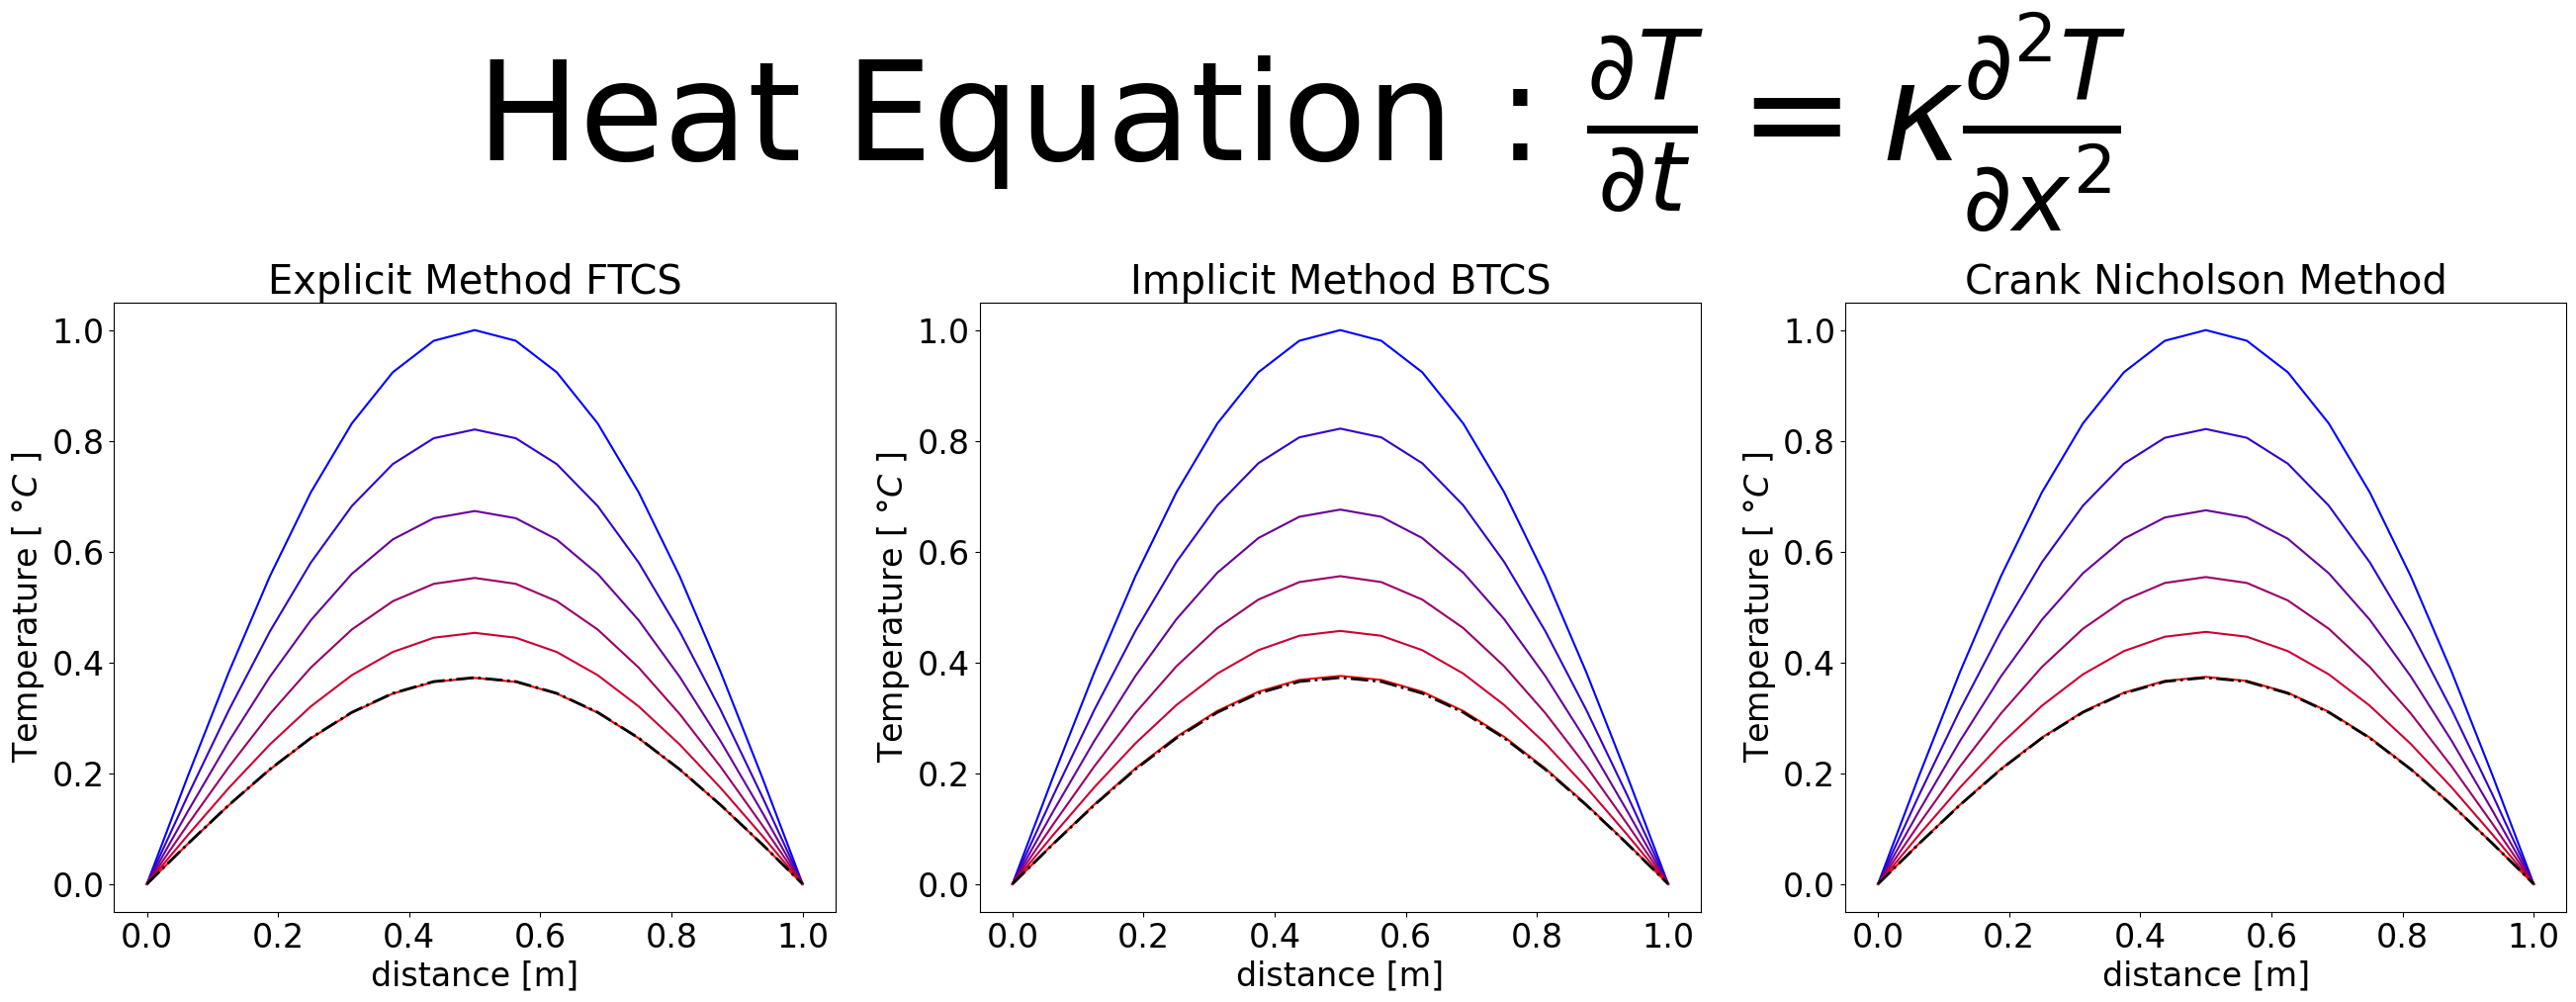

In [11]:
kappa=1
L = 1
tf = 0.1
N = 16
h=L/N
k=0.001
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a+h,h)
t=np.arange(0,b+k,k)
boundaryConditions=[A,B]
initialConditions=np.sin(np.pi*x)

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
FE= np.sin(np.pi*x)*np.exp(-kappa*np.pi**2*np.max(t))

fig=plt.figure(figsize=(32,8))
gs =fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    if j%20==0:
        ax1.plot(x,EH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax2.plot(x,IH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax3.plot(x,CN[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
ax1.plot(x,FE,'k-.', lw=2)
ax2.plot(x,FE,'k-.', lw=2)
ax3.plot(x,FE,'k-.', lw=2)
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
plt.show()

For $\theta = 0$ the scheme is clearly explicit.                                                                          
For $\theta > 0$ the scheme is implicit, but care has to be taken about the meaning.                                     
Indeed for $0 ≤ θ ≤ 0.5,$ it can be shown that the scheme has problems in robustness.                                        
For $\theta ≥ 0.5,$ we have a better properties. Indeed, for θ = 1, we obtain the very stable (implicit) backward Euler scheme.                                                                                                                      
Finally for $\theta = 0.5,$ the resulting scheme has similarities with the trapezoidal rule in numerical
quadrature,                                                                                                               
can specifically in application of the heat equation it is known as $\textbf{Crank-Nicolson scheme}$.

Solve the equation in a box of length $L=2π$, with $N = 32$ grid points. Take $\kappa=1$ and $t = 1$ and $dt = 0.001$.          
Take the initial condition $ϕ(x,t=0)=e^{−2(x−π)^2}$ and the boundaries at $[0,0]$

<IPython.core.display.Math object>

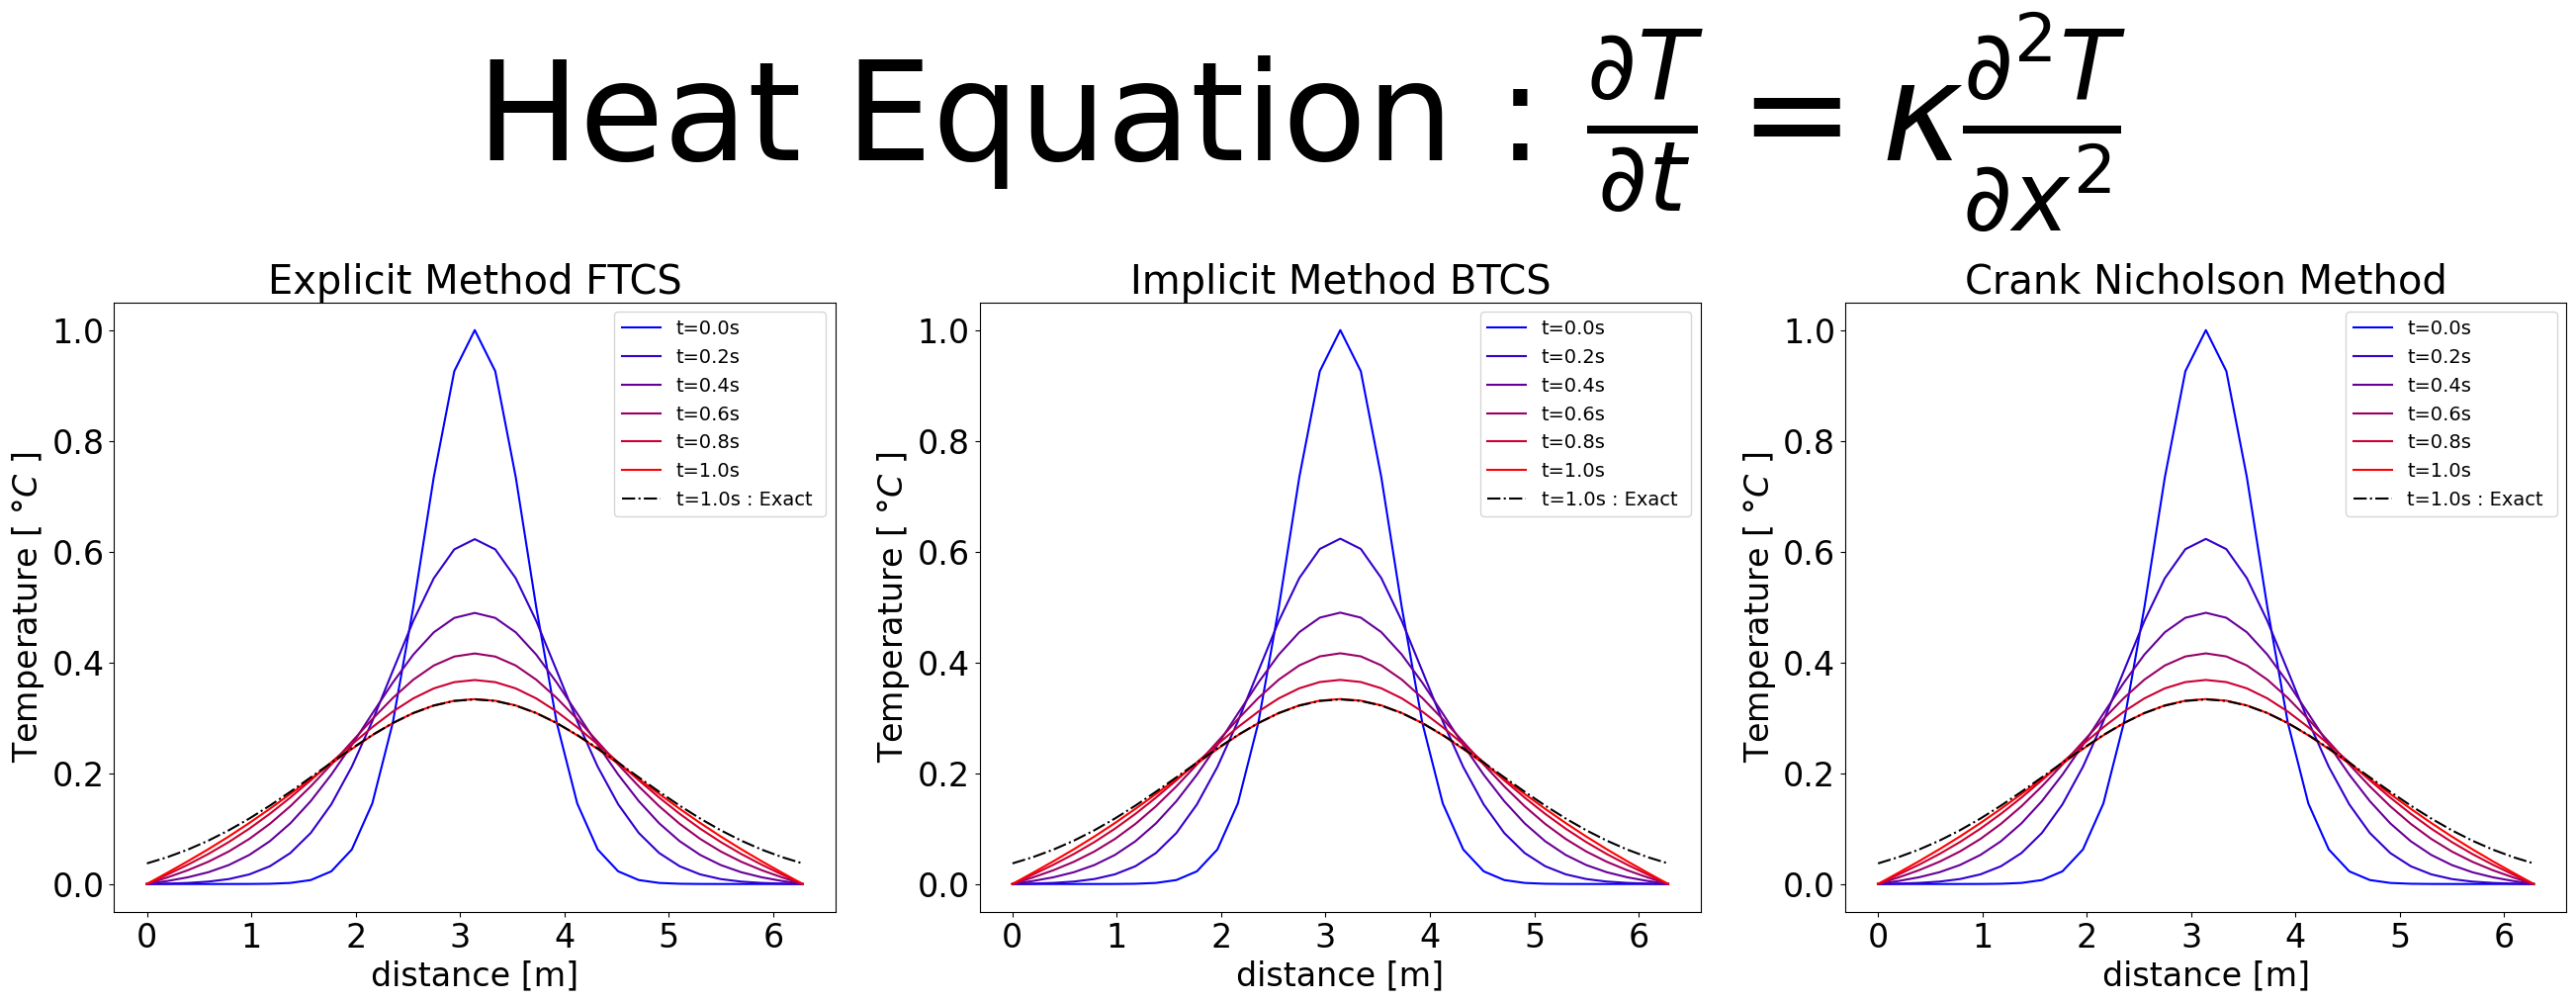

In [12]:
kappa=1
L = 2*np.pi
tf = 1
N = 32
h=L/N
k=0.001
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a + h,h)
t=np.arange(0,b + k,k)
boundaryConditions=[A,B]
initialConditions=np.exp(-2*(x-np.pi)**2)

display(Math(r'\lambda = '+latex(kappa*k/h**2)))

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)

amplitude = 1/2
a_p =np.sqrt(amplitude**2 + 2*kappa*tf)
f_exact = (amplitude/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

fig=plt.figure(figsize=(32,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    if j%200==0:
        ax1.plot(x,EH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax2.plot(x,IH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax3.plot(x,CN[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
ax1.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax2.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax3.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

Solve the equation in a box of length $L=2π$, with $N = 64$ grid points. Take $\kappa=0.3$ and $t = 1$ and $dt = 0.001$.          
Take the initial condition $ϕ(x,t=0)=e^{−2(x−π)^2}$ and the boundaries at $[0,0]$

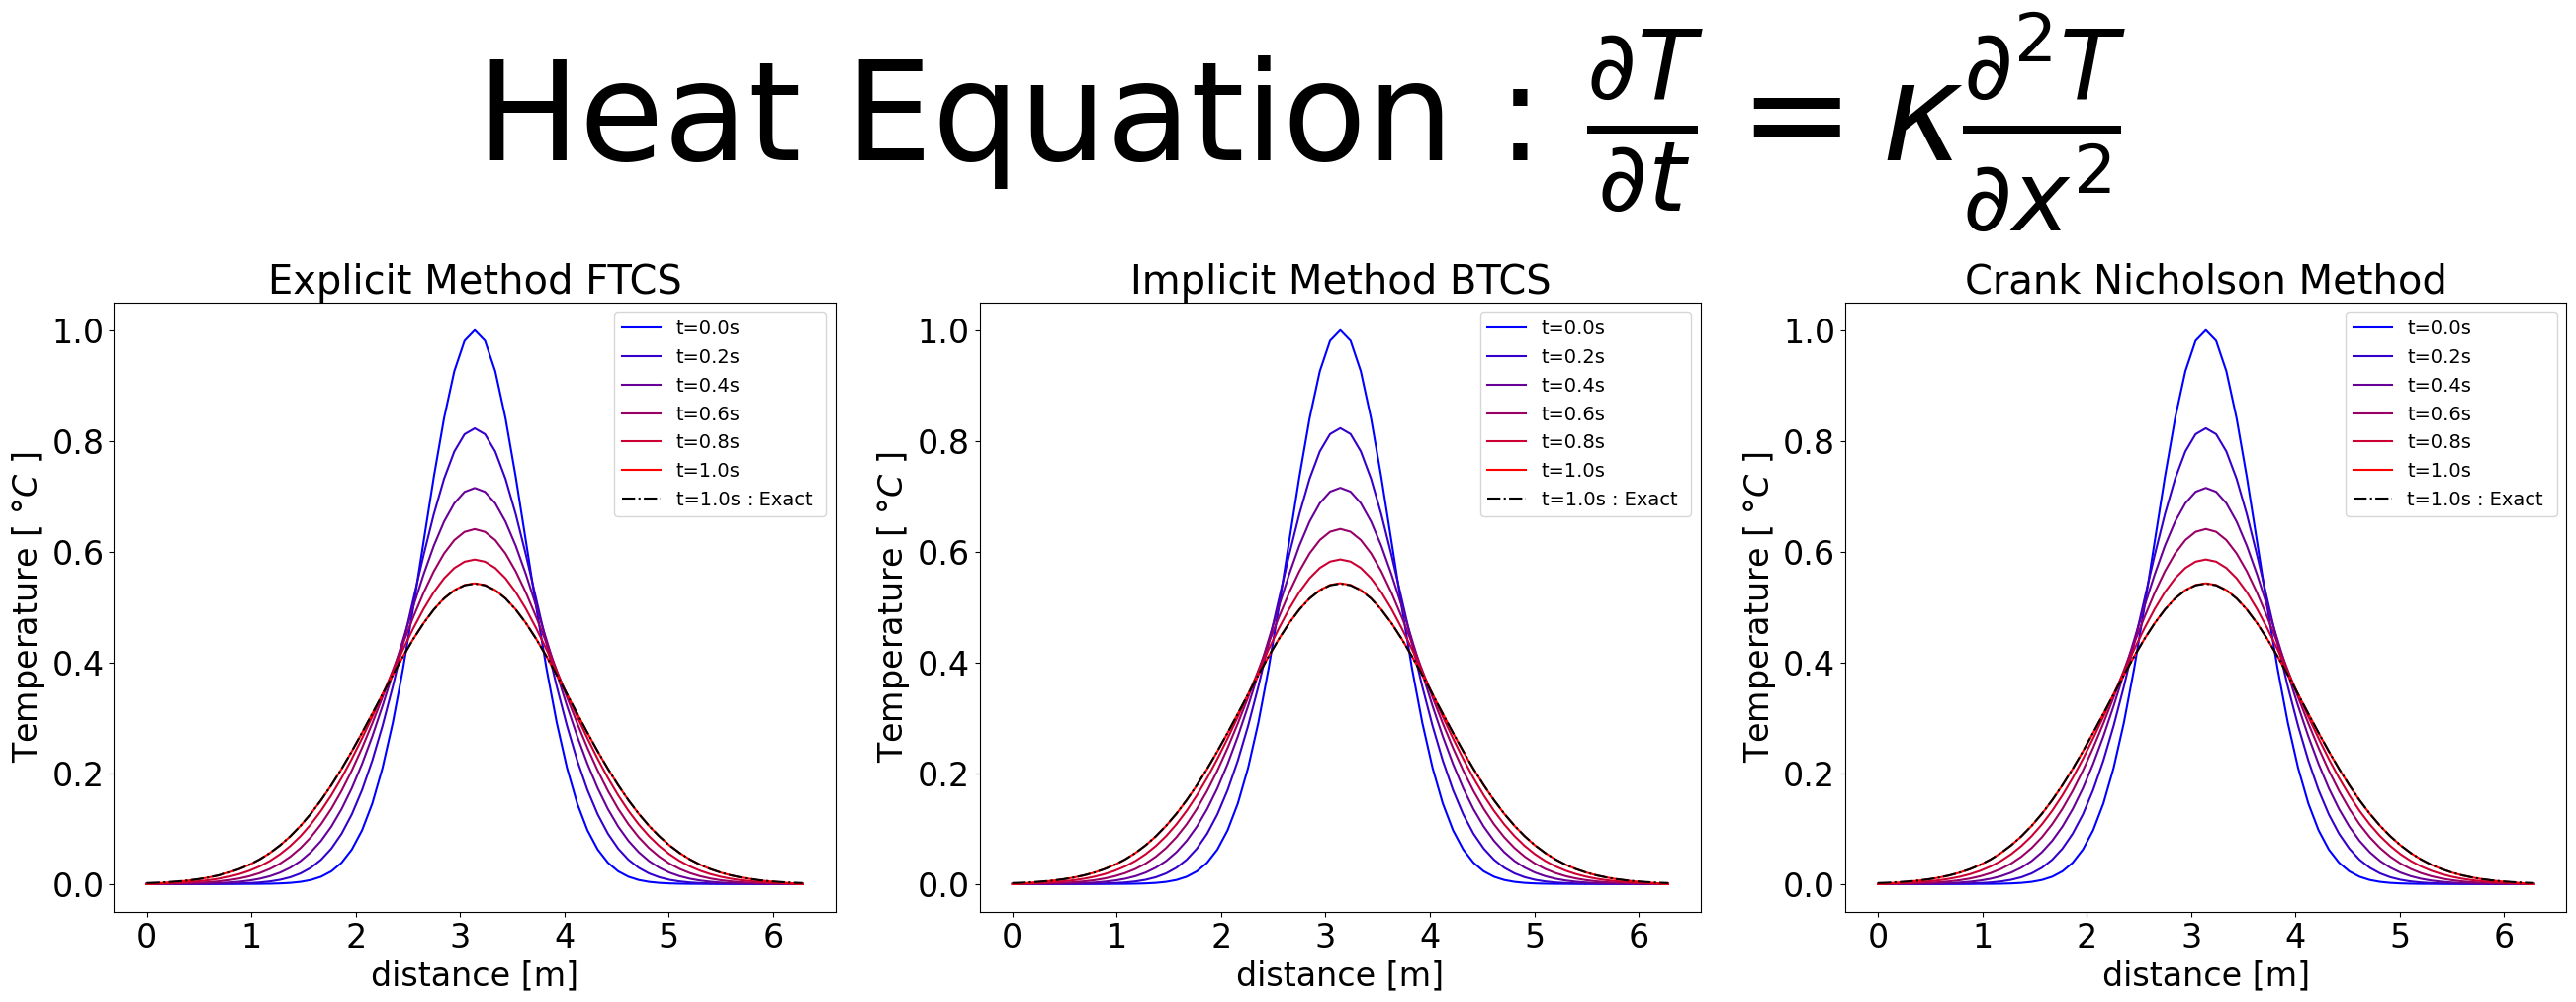

In [13]:
kappa=0.3
L = 2*np.pi
tf = 1
N = 64
h=L/N
k=0.001
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a + h,h)
t=np.arange(0,b + k,k)
boundaryConditions=[A,B]
initialConditions=np.exp(-2*(x-np.pi)**2)

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)

amplitude = 1/2
a_p =np.sqrt(amplitude**2 + 2*kappa*tf)
f_exact = (amplitude/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

fig=plt.figure(figsize=(32,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    if j%200==0:
        ax1.plot(x,EH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax2.plot(x,IH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax3.plot(x,CN[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
ax1.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax2.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax3.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ')
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

<IPython.core.display.Math object>

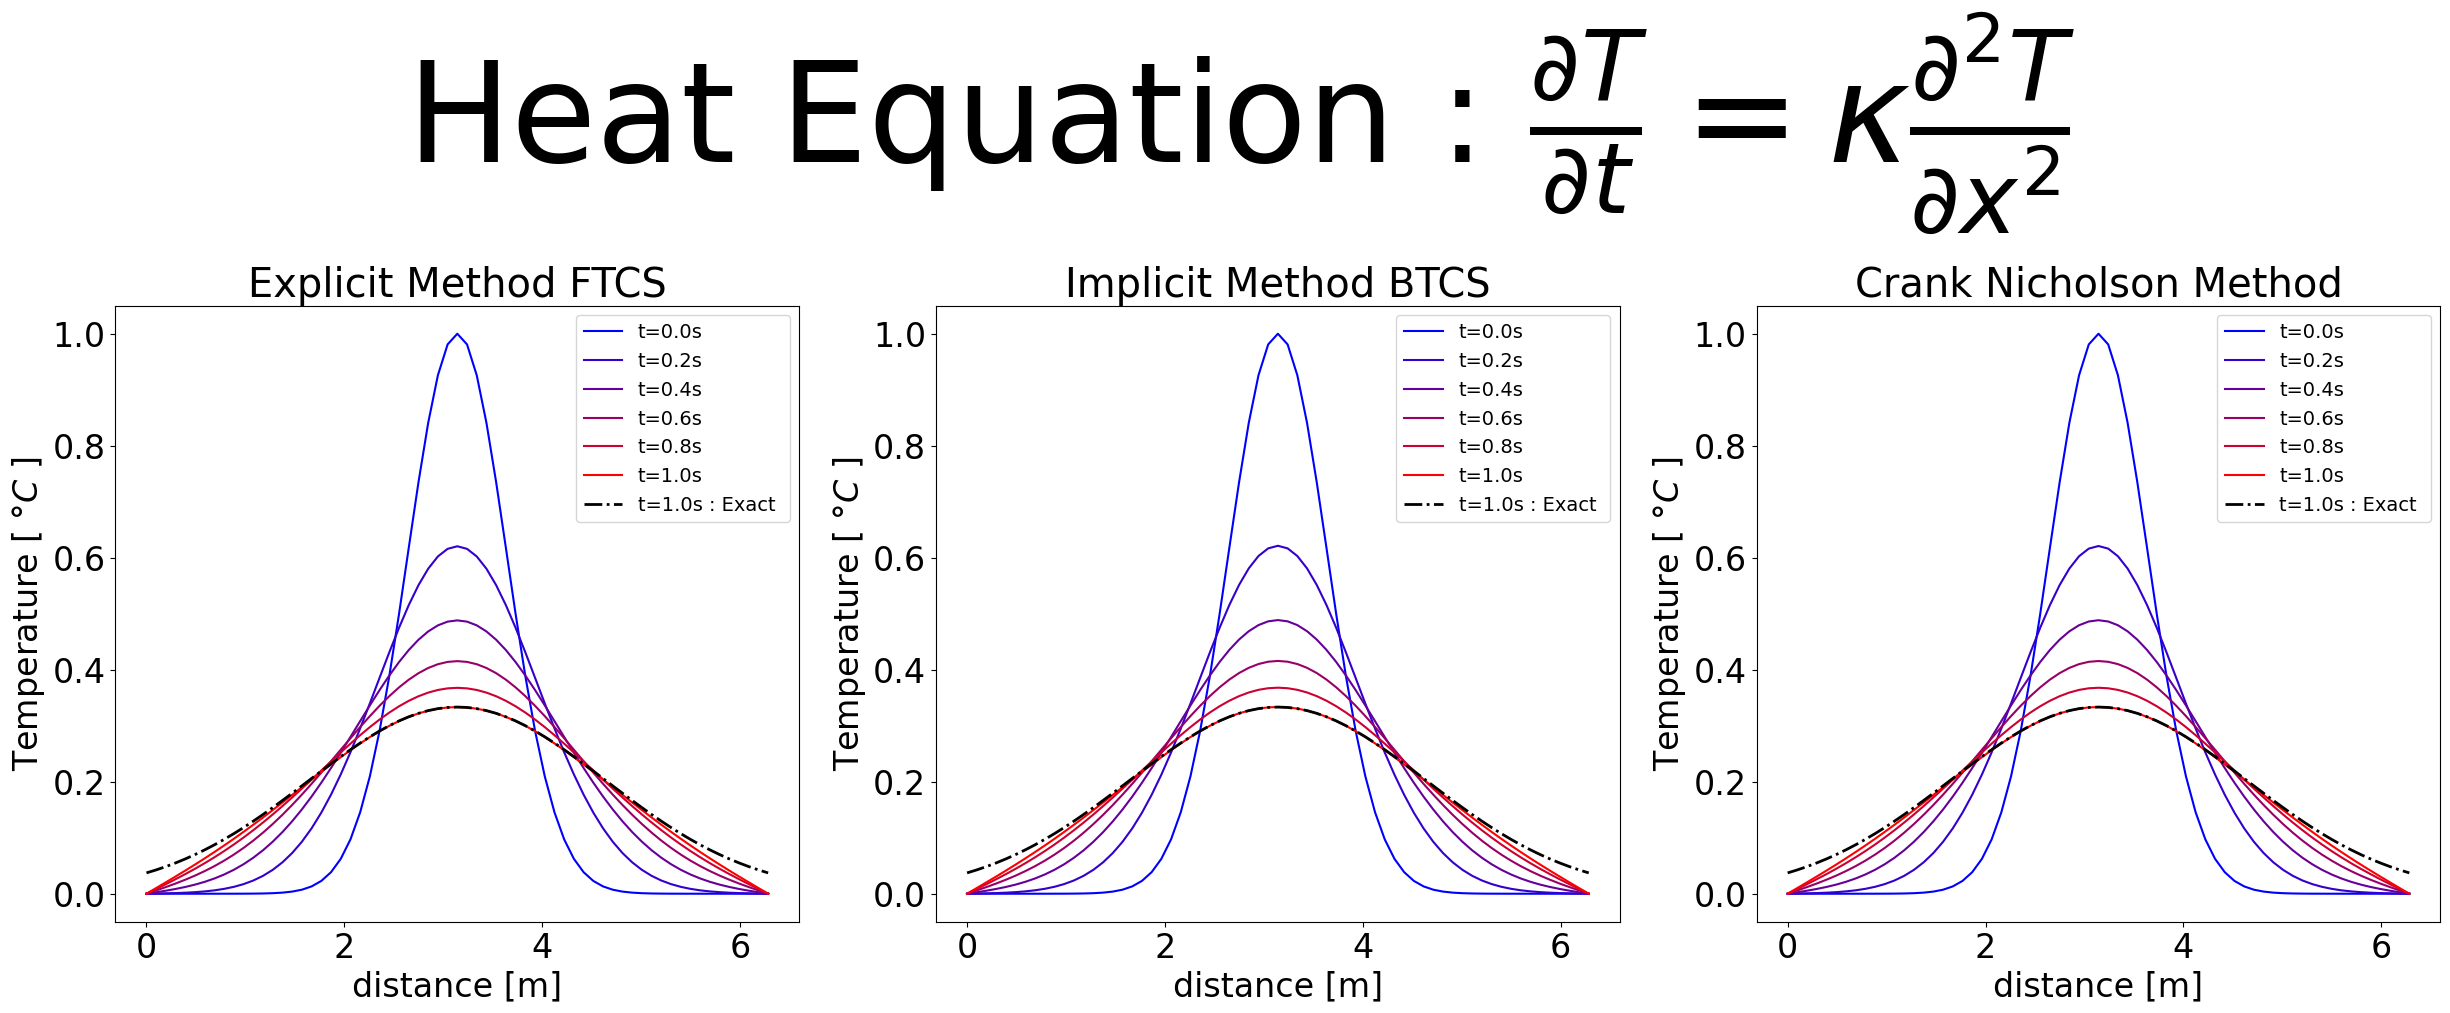

In [14]:
kappa=1
L = 2*np.pi
tf = 1
N =  64
h=L/N 
k=0.001
a=L
b=tf
A,B=0,0
lam=kappa*k/h**2
x=np.arange(0,a + h,h)
t=np.arange(0,b + k,k)
boundaryConditions=[A,B]
initialConditions=np.exp(-2*(x-np.pi)**2)

display(Math(r'\lambda = '+latex(kappa*k/h**2)))

T = heat_eqn(x, t, boundaryConditions, initialConditions)
EH=explicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
IH=implicit_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)
CN=Crank_Nicholson_heat(heat_eqn,kappa,h,k,x,t,boundaryConditions,initialConditions)

amplitude = 1/2
a_p =np.sqrt(amplitude**2 + 2*kappa*tf)
f_exact = (amplitude/a_p)*np.exp(-(x-np.pi)**2/(2*a_p**2))

fig=plt.figure(figsize=(30,8))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.suptitle(r'Heat Equation : $ \frac{ \partial T}{\partial t}=\kappa\frac{\partial^2 T}{\partial x^2}$',
             fontsize=100,y=1.25)
B=np.linspace(1,0,len(t))
G=0
R=np.linspace(0,1,len(t))
for j in range(len(t)):
    if j%200==0:
        ax1.plot(x,EH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax2.plot(x,IH[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
        ax3.plot(x,CN[:,j],color=[R[j],G,B[j]], label=f't={j*k}s')
ax1.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ', lw=2)
ax2.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ', lw=2)
ax3.plot(x,f_exact, 'k-.', label='t=1.0s : Exact ', lw=2)
ax1.set_xlabel('distance [m]')
ax1.set_ylabel(r'Temperature [ $\degree C$ ]')
ax1.set_title('Explicit Method FTCS')
ax2.set_xlabel('distance [m]')
ax2.set_ylabel(r'Temperature [ $\degree C$ ]')
ax2.set_title('Implicit Method BTCS')
ax3.set_xlabel('distance [m]')
ax3.set_ylabel(r'Temperature [ $\degree C$ ]')
ax3.set_title('Crank Nicholson Method')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()